# Appendix A:

ADS 599 Capstone: Detecting Intracranial Hemorrhage in Brain CT Scans Using Convolutional Neural Networks

Team 11:

* Hoori Javadnia
* Fatemeh Khosravi

## Data Importing, Data Analysis and Visualization
* Import dataset and describe characteristics such as dimensions, null values, duplicated values.
* Target Distribution visualization and Correlation visualization.

## Dataset Description
The selected dataset is the CT-ICH (Computed Tomography - Intracranial Hemorrhage) dataset. It consists of 2,500 head CT images in jpg format (650*650 pixel), specifically brain window. These images belong to 82 different patients, with approximately 30 image slices per patient.The dataset includes CSV file containing hemorrhage diagnosis.

Origin: Kaggle https://www.kaggle.com/datasets/vbookshelf/computed-tomography-ct-images

* File Types: CSV, JPG
* File Size: 118.7 MB
* Modeling Problem: Classification
* Missing Values: No
* Duplicated Values: No
* Unbalanced Dataset: Yes

## Feature Descriptions

* PatientNumber : Numerical indicators assigned to each patient starts from 49.
* SliceNumber : Numerical indicators assigned to each image slice starts from 1.
* Intraventricular : Assigned a value of 1 or 0 based on whether the patient has intraventricular hemorrhage.
* Intraparenchymal : Assigned a value of 1 or 0 based on whether the patient has Intraparenchymal hemorrhage.
* Subarachnoid : Assigned a value of 1 or 0 based on whether the patient has * Subarachnoid hemorrhage.
* Epidural : Assigned a value of 1 or 0 based on whether the patient has Epidural hemorrhage.
* Subdural : Assigned a value of 1 or 0 based on whether the patient has Subdural hemorrhage.
* Fracture_Yes_No : Assigned a value of 1 or 0 to indicate the presence or absence of a fracture in the patient.

Target Feature:

* No_Hemorrhage : Assigned a value of 0 or 1 to indicate the presence or absence of a hemorrhage in the patient.

## Import Libraries

In [1]:
# loading the necessary libraries
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#!pip install dython
from dython.nominal import associations

 The dataset downloaded from Kaggle is in the form of zip file. To begin, we extract these zip file within our designated directory. Then we import hemorrhage_diagnosis csv file.

In [3]:
# Extract all the contents of zip file in current directory
with ZipFile('Patients_CT.zip', 'r') as zipObj:
  zipObj.extractall()


## Read Data
The dataset comprises 2501 rows and 9 columns.

In [2]:
# Read csv file
hemo_diag=pd.read_csv('Patients_CT/hemorrhage_diagnosis.csv')
print(hemo_diag.shape)

# Data dimension
hemo_diag.head()

(2501, 9)


,PatientNumber,SliceNumber,Intraventricular,Intraparenchymal,Subarachnoid,Epidural,Subdural,No_Hemorrhage,Fracture_Yes_No
0,49,1,0,0,0,0,0,1,0
1,49,2,0,0,0,0,0,1,0
2,49,3,0,0,0,0,0,1,0
3,49,4,0,0,0,0,0,1,0
4,49,5,0,0,0,0,0,1,0


## Missing Data
The dataset contains no null values.

In [4]:
hemo_diag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   PatientNumber     2501 non-null   int64
 1   SliceNumber       2501 non-null   int64
 2   Intraventricular  2501 non-null   int64
 3   Intraparenchymal  2501 non-null   int64
 4   Subarachnoid      2501 non-null   int64
 5   Epidural          2501 non-null   int64
 6   Subdural          2501 non-null   int64
 7   No_Hemorrhage     2501 non-null   int64
 8   Fracture_Yes_No   2501 non-null   int64
dtypes: int64(9)
memory usage: 176.0 KB


## Duplicated Data
No duplicated values are present in the dataset.

In [5]:
# Count the number of dubplicated rows.
sum(hemo_diag.duplicated())

0

The dataset includes a total of 82 patients.


In [6]:
# Unique patients
len(hemo_diag['PatientNumber'].unique())

82

## Hemorrhage Distribution
The dataset consists of 318 patients with hemorrhage and 2183 patients without hemorrhage. The dataset demonstrates an imbalance in its distribution.

In [7]:
# Rename 'No_Hemorrhage' and 'Fracture_Yes_No' columns
hemo_diag['Has_Fracture'] = np.where(hemo_diag['Fracture_Yes_No']==0, 0,1)
hemo_diag['Has_Hemorrhage'] = np.where(hemo_diag['No_Hemorrhage']==1, 0,1)

# Drop the old columns
hemo_diag = hemo_diag.drop(['No_Hemorrhage','Fracture_Yes_No'], axis=1)

# Hemorrhage count
hemo_diag['Has_Hemorrhage'].value_counts()


0    2183
1     318
Name: Has_Hemorrhage, dtype: int64

Text(0.5, 1.0, 'Hemorrhage Distribution')

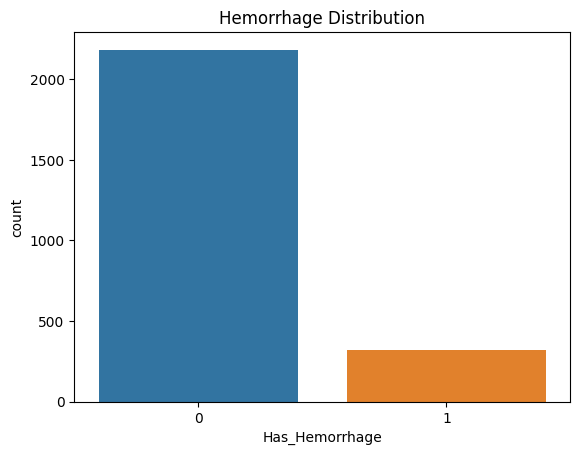

In [8]:
# Plot Hemorrhage distribution
sns.countplot(x ='Has_Hemorrhage',data = hemo_diag).set_title ('Hemorrhage Distribution')

## Sub-Hemorrhage Analysis

Within this dataset, there are:

* 2183 patients without hemorrhage.
* 293 patients with one type of hemorrhage.
* 24 patients with two types of hemorrhage.
* 1 patient with three types of hemorrhage.

In [9]:
# Creating new column and counting the number of detected hemorrhage types
# in each patient
hemo_type=['Intraventricular','Intraparenchymal','Subarachnoid',
                    'Epidural','Subdural']

hemo_diag['count_hemo_type']=hemo_diag[hemo_type].sum(axis=1)

hemo_diag['count_hemo_type'].value_counts()

0    2183
1     293
2      24
3       1
Name: count_hemo_type, dtype: int64

In [10]:
# Count the total number for each sub-hemorrhage category.
for  type in hemo_type:
  num_sub_hemmo = hemo_diag.loc[hemo_diag[type]==1.0].shape[0]
  print( 'Number of', type ,' Hemmorrage in Dataset Is:', num_sub_hemmo)

Number of Intraventricular  Hemmorrage in Dataset Is: 24
Number of Intraparenchymal  Hemmorrage in Dataset Is: 73
Number of Subarachnoid  Hemmorrage in Dataset Is: 18
Number of Epidural  Hemmorrage in Dataset Is: 173
Number of Subdural  Hemmorrage in Dataset Is: 56


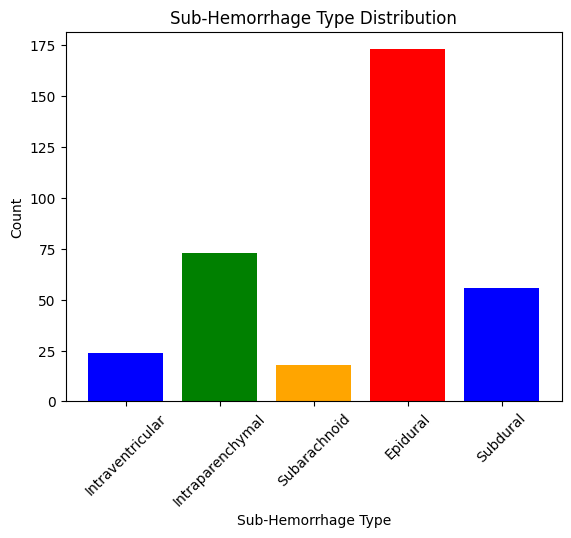

In [11]:
# Barplot of sub-hemorrhage types
counts = []
labels = []
colors = ['blue', 'green', 'orange', 'red']  # Add more colors if needed

for type in hemo_type:
    num_sub_hemmo = hemo_diag[type].sum()
    counts.append(num_sub_hemmo)
    labels.append(type)

plt.bar(labels, counts, color=colors)
plt.xlabel('Sub-Hemorrhage Type')
plt.ylabel('Count')
plt.title('Sub-Hemorrhage Type Distribution')
plt.xticks(rotation=45)
plt.show()

## Hemorrhage vs. Fracture
There are 195 cases with fracture and 2306 cases without fracture in the data.
More than half of the patients who experienced hemorrhage also exhibited the presence of a fracture.

In [12]:
# Number of Fracture
hemo_diag['Has_Fracture'].value_counts()

0    2306
1     195
Name: Has_Fracture, dtype: int64

<Axes: title={'center': 'Normalized bar graph of Has_Fracture with Has_Hemorrhage overlay'}, xlabel='Has_Fracture'>

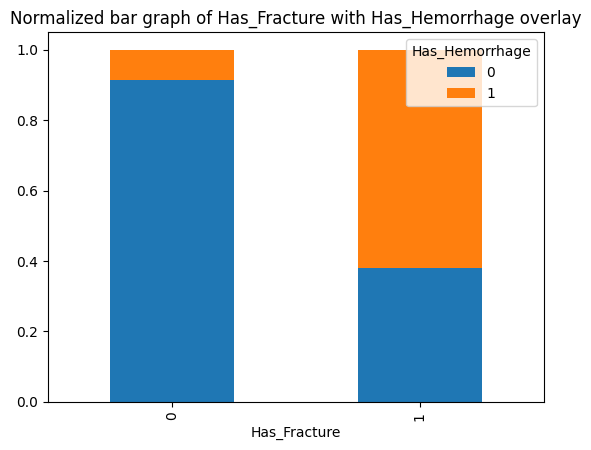

In [13]:
# Plotting Hemorrhage vs. Fracture
crosstab1=pd.crosstab(hemo_diag['Has_Fracture'], hemo_diag['Has_Hemorrhage'])
crosstab1_norm=crosstab1.div(crosstab1.sum(1),axis=0)
crosstab1_norm.plot(kind='bar', stacked='True' ,
     title= 'Normalized bar graph of Has_Fracture with Has_Hemorrhage overlay')

## Correlation Plot
The correlation plot reveals a strong connection of 0.96 between having hemorrhage and the count of sub-hemorrhages. Additionally, there's a notable correlation of 0.71 between hemorrhage presence and the occurrence of Epidural hemorrhage.

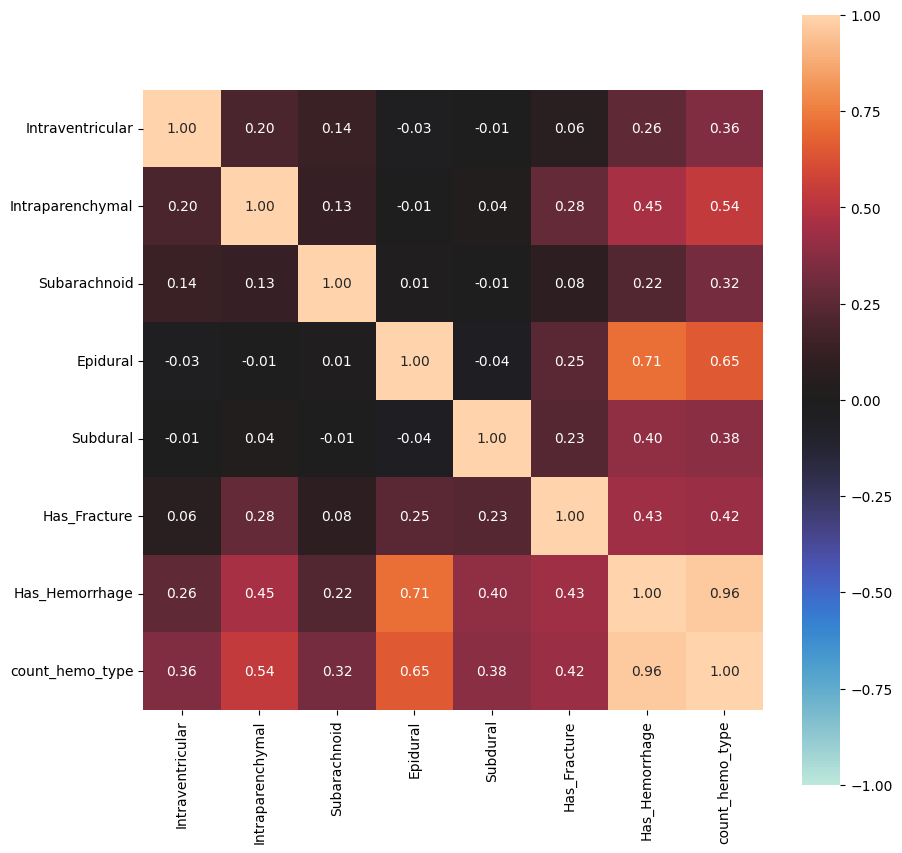

In [14]:
#Correlation plot of categorical variables
df=hemo_diag.drop(['PatientNumber',	'SliceNumber'],axis=1)
complete_correlation= associations(df, filename= 'complete_correlation.png', figsize=(10,10))